# Laboratorio Regresión Lineal


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sys
sys.path.append("../../")
from src.soporte_metricas import(
    generar_df_comparador,
    scatterplot_regresion,
    residual_plot
)

# Vamos a realizar la Regresión Lineal
Usando ambos metodos de Encoding utilizados

In [2]:
df_target = pd.read_csv("../../datos/06_Modelo6/06_autorenew_target_encoded.csv",index_col=0)
df_frequency = pd.read_csv("../../datos/06_Modelo6/06_autorenew_frequency_encoded.csv",index_col=0)

In [3]:
df_target.shape

(334843, 10)

# Que estoy haciendo?

Voy a ver las dos codificaciones, Frequency & Target, y veremos cual sale mejor, a partir de ahí vamos a intentar enseñar de forma visual que tan bien se adapta nuestro modelo a la realidad

# Frequency Encoder Train

In [4]:
Xfreq = df_frequency.drop(columns="price")
yfreq = df_frequency[["price"]]

### Dividimos los Grupos (70% train y 30% test)

In [5]:
Xfreq_train, Xfreq_test, yfreq_train, yfreq_test = train_test_split(Xfreq,yfreq,train_size=0.7,random_state=42)

### Generamos Regresión Lineal

In [6]:
modelofreq_lineal = LinearRegression()
modelofreq_lineal.fit(Xfreq_train,yfreq_train)

LinearRegression()

### Hacemos predicciones de Precio del 70% y el 30%
Con ello veremos que tan bien se le da a nuestro modelo predecir


In [7]:
yfreq_train_pred = modelofreq_lineal.predict(Xfreq_train)
yfreq_train_pred[:3]

array([[2329.39347983],
       [3420.53366145],
       [2147.98280522]])

In [9]:
yfreq_test_pred = modelofreq_lineal.predict(Xfreq_test)
yfreq_test_pred[:3]

array([[ 5873.04779985],
       [10630.66032903],
       [ 2172.06433302]])

In [11]:
metricas_freq = {
    'train': {
    'r2_score': r2_score(yfreq_train, yfreq_train_pred),
    'MAE': mean_absolute_error(yfreq_train, yfreq_train_pred),
    'MSE': mean_squared_error(yfreq_train, yfreq_train_pred),
    'RMSE': np.sqrt(mean_squared_error(yfreq_train, yfreq_train_pred))
    },
    'test': {
    'r2_score': r2_score(yfreq_test, yfreq_test_pred),
    'MAE': mean_absolute_error(yfreq_test, yfreq_test_pred),
    'MSE': mean_squared_error(yfreq_test, yfreq_test_pred),
    'RMSE': np.sqrt(mean_squared_error(yfreq_test, yfreq_test_pred))
    }
}

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame(metricas_freq).T

,r2_score,MAE,MSE,RMSE
train,0.32,4002.46,38033467.97,6167.13
test,0.32,3953.47,36207047.66,6017.23


### Que vemos

- Vemos un R2 muy bajo y un índice de error muy alto
- Veamos con el otro método

# Target Encoded Train

In [13]:
df_target.sample()

,offerType,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,price,yearOfRegistration,gama,powerCV_robust_scaler
288436,6145.40,5539.81,8645.84,4956.84,7025.45,4052.00,1100.00,12436.82,3678.18,2553.14


# Creamos dos DFs
- X es todo menos price
- Y es solo price

In [14]:
Xtarget = df_target.drop(columns="price")
ytarget = df_target[["price"]]

# Dividimos los grupos en un 70%
- Donde el train size sera el 70%.
- El test size el 30% restante.

In [15]:
Xtarget_train, Xtarget_test, ytarget_train, ytarget_test = train_test_split(Xtarget,ytarget,train_size=0.7,random_state=42)

# Aprendamos

In [16]:
modelotarget_lineal = LinearRegression()
modelotarget_lineal.fit(Xtarget_train,ytarget_train)

LinearRegression()

In [17]:
ytarget_train_pred = modelotarget_lineal.predict(Xtarget_train)
ytarget_train_pred[:3]

array([[4921.16438445],
       [2349.07557109],
       [3808.28916651]])

In [18]:
ytarget_test_pred = modelotarget_lineal.predict(Xtarget_test)
ytarget_test_pred[:3]

array([[-1304.12132249],
       [ 5772.91534138],
       [  901.78752469]])

In [19]:
metricas_target = {
    'train': {
    'r2_score': r2_score(ytarget_train, ytarget_train_pred),
    'MAE': mean_absolute_error(ytarget_train, ytarget_train_pred),
    'MSE': mean_squared_error(ytarget_train, ytarget_train_pred),
    'RMSE': np.sqrt(mean_squared_error(ytarget_train, ytarget_train_pred))
    },
    'test': {
    'r2_score': r2_score(ytarget_test, ytarget_test_pred),
    'MAE': mean_absolute_error(ytarget_test, ytarget_test_pred),
    'MSE': mean_squared_error(ytarget_test, ytarget_test_pred),
    'RMSE': np.sqrt(mean_squared_error(ytarget_test, ytarget_test_pred))
    }
}

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_metricas = pd.DataFrame(metricas_target).T
df_metricas

,r2_score,MAE,MSE,RMSE
train,0.66,2762.76,19231671.73,4385.39
test,0.65,2738.64,18515822.91,4303.00


# No parece una regresión Lineal
- Por la naturaleza de los datos no parece una regresión lineal
- También es posible que yo me haya equivocado, algo que es totalmente normal
- Pero realmente he intentado ajustar los datos a que puede ser real y que no puede ser real, hay cosas que de ser un error,en los datos, es algo totalmente válido en el mundo real
- Como análisis extra, podríamos revisar que los CV estuvieran dentro de un rango por marcas (es decir que volkswagen solo tiene coches de mínimo 75CV y máximo 420CV por ejemplo)

- Por otro lado, esta claro que de ambos encodings, Target encoding parece el modelo mejor entrenado y con un r2 más alto
- Aunque si revisamos el RMSE podemos ver que los errores son bastantes elevados, equivocarte 11.000€ ya es un error elevado, pero 16.000€ aún más
- Estamos hablando de que un coche que valga 25.000€ puede realmente estar valiendo 14.000€ o 36.000€ considero que es un error muy elevado!

¿Porque puede estar ocurriendo esto?
- Viendo que nuestro r2 no es muy alto pero no es extremadamente bajo y viendo nuestro RMSE considero que:
    - Estamos categorizando de forma muy específica y tal vez eso con la cantidad de datos que tenemos no se ajuste correctamente
    - Estamos ante unos datos que no se pueden tratar de forma lineal, el mercado del motor es un mercado que no podemos considerar linea, hay muchas variables que pueden afectar al precio y no es algo que pueda ser lineal (tal y como tengo los datos planteados)

# Visualicemos
- Vamos a ver que tan bien se ajusta nuestro modelo a la realidad


In [21]:
df_comparador = generar_df_comparador(Xtarget_train,Xtarget_test,ytarget_train,ytarget_test,ytarget_train_pred,ytarget_test_pred,"price_pred")

In [22]:
df_comparador

,offerType,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,yearOfRegistration,gama,powerCV_robust_scaler,price,price_pred
0,6145.40,10590.91,8645.84,4956.84,2759.00,6475.13,12436.82,7471.21,15581.44,18300.00,17099.40
1,6145.40,13192.13,8645.84,10535.78,3756.20,6475.13,5379.46,7471.21,7818.48,9800.00,11110.20
2,6145.40,3146.71,5153.38,4956.84,7025.45,4052.00,5379.46,7471.21,2194.84,1500.00,1265.63
3,6145.40,3146.71,8645.84,4956.84,7025.45,8723.66,5379.46,3678.18,4933.92,3600.00,5697.28
4,6145.40,5539.81,5153.38,4956.84,2759.00,4052.00,2041.31,7471.21,4648.89,650.00,458.57
...,...,...,...,...,...,...,...,...,...,...,...
334838,6145.40,5539.81,3733.06,3879.46,3756.20,16471.64,5379.46,11380.71,2200.00,2200.00,10384.96
334839,6145.40,9939.73,5153.38,10535.78,7025.45,6475.13,5379.46,3678.18,2553.14,1199.00,4442.05
334840,6145.40,6813.85,8645.84,4956.84,7025.45,4052.00,2041.31,7471.21,4648.89,9200.00,4040.47
334841,6145.40,6078.38,8645.84,4956.84,3756.20,4052.00,5379.46,7471.21,2547.59,3400.00,2844.46


In [23]:
df_comparador.to_csv("../../datos/06_Modelo6/07_autorenew_prediccion_regresion_lineal.csv")

# Pintamos el Scatter Plot con X e Y

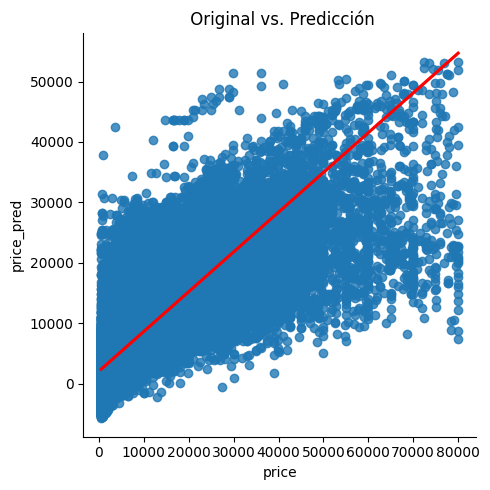

In [24]:
scatterplot_regresion(df_comparador,"price","price_pred")

# Sobre la gráfica
- Vemos que no seguimos una regresión lineal, por lo que hacer predicciones sobre la misma no es correcto
- Y bueno, yo de esto no sabía pero el área de la regresión crece a medida que sube, esto es el intervalo de confianza, que nos indica una incertidumbre alta en las predicciones para valores más altos y soporta mi teoría

# Veamos nuestra Realidad

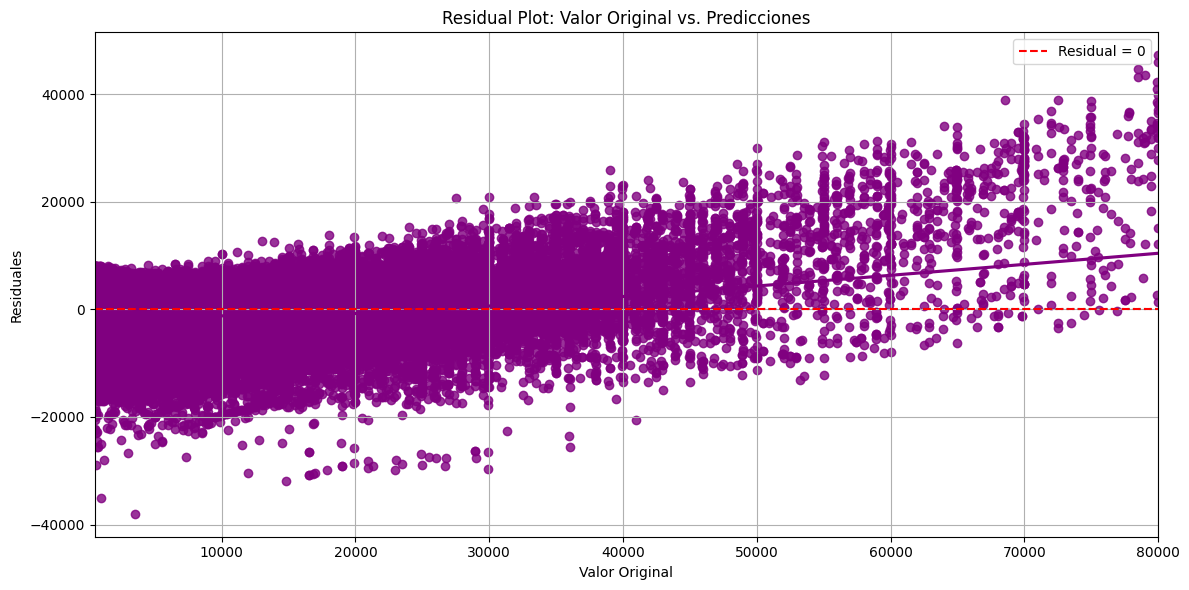

In [25]:
residual_plot(df_comparador,"price","price_pred")

# Sobre Nuestra Gráfica
- Vemos que no seguimos el residual 0 con la línea morada
- Los puntos están bastante alejados del residual 0
- Que la línea morada suba indica que los errores tienden a aumentar a medida que aumentan los precios reales

Todo esto nos confirma una vez más lo que dijimos antes.
La regresión lineal no nos vale para este conjunto de datos.

Aunque creo que aquí se puede observar muy bien el porque. Si miras un Residual plot perfecto y este... pues como que no está bien.